# Image Data Preparation

## How to Load and Manipulate Images With PIL/Pillow

In [3]:
PATH = '/Users/test/Documents/Software-projects/Python Projects/Deep-Learning-Projects/Deep-Learning-Overfitting-Cook-Book/images/'

In [15]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open(PATH+'opera-house.jpeg')
# summarize some details about the image print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

RGB
(640, 360)


uint8
(360, 640, 3)


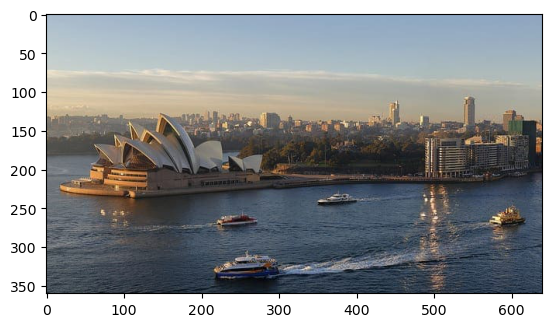

In [18]:
from matplotlib import pyplot
from matplotlib import image
# load image as pixel array
data = image.imread(PATH + 'opera-house.jpeg')
# summarize shape of the pixel array 
print(data.dtype)
print(data.shape)
# display the array of pixels as an image 
pyplot.imshow(data)
pyplot.show()

In [20]:

# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open(PATH + 'opera-house.jpeg') # convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details 
print(image2.format) 
print(image2.mode)
print(image2.size)

(360, 640, 3)
None
RGB
(640, 360)


In [22]:

# example of saving an image in another format
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# save as PNG format 
image.save('opera_house.png', format='PNG')
# load the image again and inspect the format 
image2 = Image.open('opera_house.png') 
print(image2.format)

PNG


In [23]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format 
gs_image.save('opera_house_grayscale.jpeg')
# load the image again and show it
image2 = Image.open('opera_house_grayscale.jpeg') # show the image
image2.show()

## How to Resize Images

In [24]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# report the size of the image 
print(image.size)
# create a thumbnail and preserve aspect ratio 
image.thumbnail((100,100))
# report the size of the modified image 
print(image.size)
# show the image
image.show()

(640, 360)
(100, 56)


In [25]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# report the size of the image 
# report the size of the 
print(image.size)
# resize image and ignore original aspect ratio 
img_resized = image.resize((200,200))
# report the size of the thumbnail 
print(img_resized.size)
# show the image
img_resized.show()

(640, 360)
(200, 200)


## How to Flip, Rotate, and Crop Images

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_43241/2168518486.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(312)


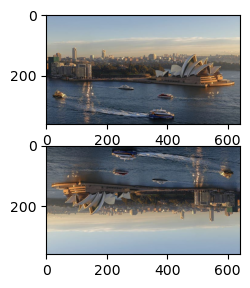

In [26]:
image = Image.open(PATH + 'opera-house.jpeg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT) # vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM) # plot all three images using matplotlib pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

## Rotate Image

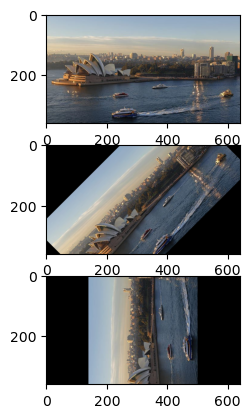

In [27]:
image = Image.open(PATH + 'opera-house.jpeg')

# plot original image
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()

## Cropped Image

In [28]:
image = Image.open(PATH + 'opera-house.jpeg')

# create a cropped image
cropped = image.crop((100, 100, 200, 200)) # show cropped image
cropped.show()

In [39]:
image = Image.open(PATH + "sydney_bridge.png")

## Normalize Pixel Values

* Normalization is a good default data preparation that can be performed if you are in doubt as to the type of data preparation to perform. It can be performed per image and does not require the calculation of statistics across the training dataset, as the range of pixel values is a domain standard.

In [30]:
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max())) # convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 158.000
Min: 0.000, Max: 0.620


## Center Pixel Values

### A popular data preparation technique for image data is to subtract the mean value from the pixel values. This approach is called centering, as the distribution of the pixel values is centered on the value of zero. Centering can be performed before or after normalization. Centering the pixels then normalizing will mean that the pixel values will be centered close to 0.5 and be in the range 0-1. Centering after normalization will mean that the pixels will have positive and negative values, in which case images will not display correctly (e.g. pixels are expected to have value in the range 0-255 or 0-1). Centering after normalization might be preferred, although it might be worth testing both approaches.

#### Centering requires that a mean pixel value be calculated prior to subtracting it from the pixel values. There are multiple ways that the mean can be calculated; for example:
* Per image.
* Per minibatch of images (under stochastic gradient descent).
* Per training dataset.
#### The mean can be calculated for all pixels in the image, referred to as a global centering, or it can be calculated for each channel in the case of color images, referred to as local centering.
* Global Centering: Calculating and subtracting the mean pixel value across color channels.
* Local Centering: Calculating and subtracting the mean pixel value per color channel.


In [31]:
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max())) # global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 70.046
Min: 0.000, Max: 158.000
Mean: -0.000
Min: -70.046, Max: 87.954


## Local Centering

In [40]:
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1)))) # per-channel centering of pixels
pixels -= means
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Means: 70.04633195823598
Mins: 0.0, Maxs: 158.0
Means: -1.3547522999415887e-06
Mins: -70.04633, Maxs: 87.95367


## Standardize Pixel Values

### Global Standardization

In [33]:
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std)) # global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 70.046, Standard Deviation: 49.716
Mean: -0.000, Standard Deviation: 1.000


### Positive Global Standardization

In [37]:
from numpy import clip

pixels = asarray(image)
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std)) # global standardization of pixels

pixels = (pixels - mean) / std
# clip pixel values to [-1,1]
pixels = clip(pixels, -1.0, 1.0)
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 70.046, Standard Deviation: 49.716
Mean: 0.478, Standard Deviation: 0.400
Min: 0.000, Max: 1.000


###  Local Standardization

In [38]:
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations 
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64') 
print('Means: %s, Stds: %s' % (means, stds))
# per-channel standardization of pixels

pixels = (pixels - means) / stds
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64') 
stds = pixels.std(axis=(0,1), dtype='float64') 
print('Means: %s, Stds: %s' % (means, stds))

Means: 70.04633195823598, Stds: 49.71637150303332
Means: -2.503685893622286e-08, Stds: 1.0000000357627679


## How to Load and Manipulate Images with Keras

In [4]:
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
img = load_img(PATH + 'bondi_beach.jpg')

In [5]:
# report details about the image print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()


JPEG
RGB
(640, 427)


## How to Convert an Image With Keras

In [6]:
from tensorflow.keras.utils import img_to_array, array_to_img

print(type(img))
# convert to numpy array
img_array = img_to_array(img) 
print(img_array.dtype)
print(img_array.shape)
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
float32
(427, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


## How to Save an Image With Keras

In [7]:
from tensorflow.keras.utils import img_to_array, array_to_img, save_img

# load image as as grayscale
img = load_img(PATH + 'bondi_beach.jpg', color_mode='grayscale') 
# convert image to a numpy array
img_array = img_to_array(img)
# save the image with a new filename
save_img('bondi_beach_grayscale.jpg', img_array)
# load the image to confirm it was saved correctly
img = load_img('bondi_beach_grayscale.jpg') 
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
img.show()

<class 'PIL.Image.Image'>
None
RGB
(640, 427)


## How to Scale Image Pixel Data with Keras

### The three main types of pixel scaling techniques supported by the ImageDataGenerator class are as follows:

* Pixel Normalization: scale pixel values to the range 0-1.
* Pixel Centering: scale pixel values to have a zero mean.
* Pixel Standardization: scale pixel values to have a zero mean and unit variance.

In [8]:

# example of normalizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('Test min=%.3f, max=%.3f' % (testX.min(), testX.max()))
# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# Note: there is no need to fit the generator in this case
# prepare a iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Train min=0.000, max=255.000
Test min=0.000, max=255.000
Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


## How to Center Images With ImageDataGenerator

In [9]:

# example of centering a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report per-image mean
print('Means train=%.3f, test=%.3f' % (trainX.mean(), testX.mean()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator Mean: %.3f' % datagen.mean)
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

Means train=33.318, test=33.791
Data Generator Mean: 33.318
(64, 28, 28, 1) 3.5281522
(60000, 28, 28, 1) -1.9512918e-05


## How to Standardize Images With ImageDataGenerator

In [10]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(),
    testX.mean(), testX.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False) # get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) -0.02151907 0.97678936
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


## How to Use Image Data Augmentation in Keras

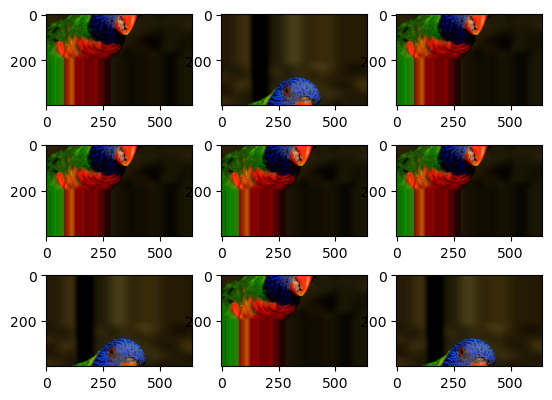

In [12]:
from numpy import expand_dims
from tensorflow.keras.utils import img_to_array, array_to_img, save_img
from keras.preprocessing.image import ImageDataGenerator 
from matplotlib import pyplot

img = load_img(PATH + 'bird.jpg')

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200]) # prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

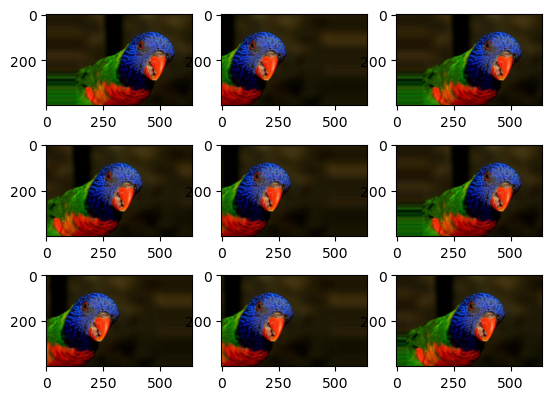

In [13]:
from numpy import expand_dims
from tensorflow.keras.utils import img_to_array, array_to_img, save_img
from keras.preprocessing.image import ImageDataGenerator 
from matplotlib import pyplot

img = load_img(PATH + 'bird.jpg')

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()